# What You Want Me to Stay? - KKBox Churn prediction

<font color='blue' size='4'><strong> Exploratory Data Analysis </strong></font>

<img src='https://i.imgur.com/VTQ0TtT.jpg'><center>image source :devopedia.org</center>

<ul style="font-family:'Georgia';font-size:18px" >
<h3><strong>Table Of Content: </strong></h3>
<br>
<br>
<li>
<h5>Introduction</h5>
    <ul>
        <li>Loading Libraries</li>
        <li>loading Data</li>
    </ul>
<li>
<h5>Visualization</h5>
    <ul>
        <li>Training and Member data</li>
        <li>Trasaction dataset</li>
        <li>User Logs</li>
    </ul>
<li>
<h5>Date Time visualization</h5>
    <ul>
        <li>Members data</li>
        <li>Transaction data</li>
    </ul>

<li>
<h5>Bivariate plots</h5>
    <ul>
        <li>Mixed dataset</li>
    </ul>

<img src='https://i.imgur.com/qIF0TVJ.jpg'><center>https://www.kaggle.com/c/kkbox-churn-prediction-challenge/<center>

## Introduction

This is the Exploratory Data Analysis of <font color='blue'> WSDM - KKBox's Churn Prediction Challenge</font> using <font color='blue'> PYTHON.</font><br><br>
WSDM (pronounced "wisdom") is one of the the premier conferences on web inspired research involving search and data mining.
WSDM hosted a challenge to build an algorithm that predicts whether a subscription user will churn using a donated dataset from KKBOX.<br>
For a subscription business, accurately predicting churn is critical to long-term success. Even slight variations in churn can drastically affect profits.<br><br>
KKBOX is Asia’s leading music streaming service, holding the world’s most comprehensive Asia-Pop music library with over 30 million tracks. They offer a generous, unlimited version of their service to millions of people, supported by advertising and paid subscriptions.<br><br>
 Currently, the company uses survival analysis techniques to determine the residual membership life time for each subscriber. By adopting different methods, KKBOX anticipates they’ll discover new insights to why users leave so they can be proactive in keeping users dancing.

Dataset comes in 5 different files<br>
<ul>
    <li>train.csv</li>
    <li>transactions.csv</li>
    <li>user_logs.csv</li>
    <li>members.csv</li>
    <li>sample_submission_zero.csv</li>
</ul>

Reference:
https://www.kaggle.com/headsortails/should-i-stay-or-should-i-go-kkbox-eda<br>
Above blog was not written in python it was written in R<br>
https://www.kaggle.com/c/kkbox-churn-prediction-challenge<br>
https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation<br>
https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

### loading Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [2]:
# Loading training data in train_data dataframe
train_data=pd.read_csv('/home/asad_99rizvi/dataset/train_v2.csv')

## visualizations

In [3]:
train_data.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


Train_data contains two columns msno and is_churn :<br>
msno is a long user_id and is_churn is out target variable

In [4]:
train_data.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Our training dataset contains 970960 values <br>
only two values are possible 0 and 1<br>
There is no abrupt value in this dataframe

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


There is NO null value present in the dataframe <br>
This dataframe takes relatively less memory then other datas<br>
one thing can be noted that : to store binary value we are using int64 (This is waste of memory)<br>
We will make it memory efficient in data Preprocessing step

<h2> Plotting count vs is_churn to check the balance in the dataset</h2>

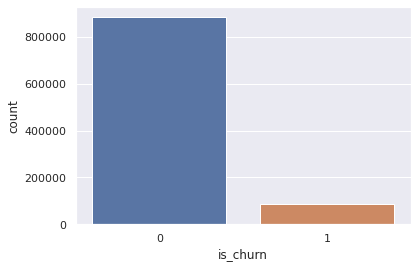

In [6]:
sns.countplot(train_data['is_churn'])
plt.show()

>_ For a business having less no of churn users is great but this makes our dataset imbalance

In [7]:
total_data=train_data['is_churn'].value_counts()[0]+train_data['is_churn'].value_counts()[1]
positive=train_data['is_churn'].value_counts()[0]
negative=train_data['is_churn'].value_counts()[1]
positive_percent=positive/total_data
negative_percent=negative/total_data
print("Total No of datapoints in train.csv is ",total_data)
print("Nos. Positive datapoints is ",positive)
print("Nos. Negative datapoint is ",negative)
print("Percent of Positive points ",positive_percent*100,"%")
print("percent of Negative points ", negative_percent*100,"%")

Total No of datapoints in train.csv is  970960
Nos. Positive datapoints is  883630
Nos. Negative datapoint is  87330
Percent of Positive points  91.00580868418885 %
percent of Negative points  8.994191315811156 %


In [8]:
train_data[train_data['is_churn'].isnull()] 

,msno,is_churn


In [9]:
# Null data points

<h3> We find </h3>
<br>
Training data consist of two rows : ID(msno) and is_churn<br>
Total count of data : 970960
Their is no null value<br>
Most of the data are not churned (91.005%)<br>
only 8.995% of the customers are Churned<br>
NO outlier in this part<br>
Different memory storing can be used

In [10]:
#loading members_v3 datain member_data 
# NOTE member.csv and member_v2.csv was replace by competition sponsers
# parsing rigistration init time feature because it is given in datetime
member_data=pd.read_csv('/home/asad_99rizvi/dataset/members_v3.csv',parse_dates=['registration_init_time'])

In [11]:
member_data.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


This dataframe contains 6 columns<br>
Clearly gender has NaN value<br>
Registration_init_time is a data-time feature<br>
Gender is given in string format Hence label encoding should be used here

In [12]:
member_data.shape #we have relatively more user than in our training set

(6769473, 6)

In [13]:
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation#
member_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,city,bd,registered_via
count,6769473.000000,6769473.000000,6769473.000000
mean,3.847358,9.795794,5.253069
std,5.478359,17.925900,2.361398
min,1.000000,-7168.000000,-1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,4.000000
75%,4.000000,21.000000,7.000000
max,22.000000,2016.000000,19.000000


City feature has no outlier minimum is 1 and maximum is 22<br>
bd: it is Age has has ouliers because there are some negative values and very high values<br>
registration via: there is a negative value in registration via option also

In [14]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   city                    int64         
 2   bd                      int64         
 3   gender                  object        
 4   registered_via          int64         
 5   registration_init_time  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 309.9+ MB


memory of this dataframe can also be optimized

#### bd stands for age

In [15]:
print(member_data['city'].value_counts())
print('Total number of distinct city ', member_data['city'].nunique())

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64
Total number of distinct city  21


In [16]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(member_data['city'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentile'])

,Percentile
0.000,1.0
10.000,1.0
20.000,1.0
30.000,1.0
40.000,1.0
50.000,1.0
60.000,1.0
70.000,1.0
80.000,5.0
90.000,13.0


City data has no outlier with city 1 being highest

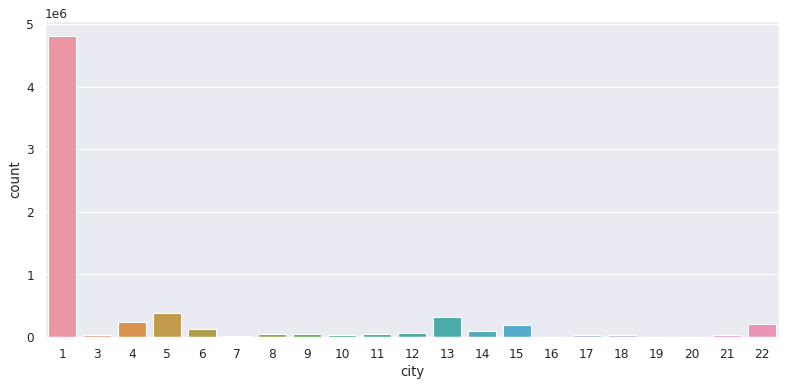

In [17]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['city'])
plt.tight_layout()
plt.show()

City 1 is dominant over all other cities<br>
other city with more No. of user are
city: 4,5,13,15,22

In [18]:
print(member_data['bd'].describe())
print('maximum value ',member_data['bd'].max())
print('minimum value',member_data['bd'].min())# very clear this contains outliers

count    6.769473e+06
mean     9.795794e+00
std      1.792590e+01
min     -7.168000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      2.016000e+03
Name: bd, dtype: float64
maximum value  2016
minimum value -7168


In [19]:
# printing percentiles because above we have seen that maximum values of there features are unusually high
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(member_data['bd'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,-7168.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,0.0
70.000,18.0
80.000,25.0
90.000,33.0


50 percentile of age is 0 that means there is less age data<br>
75 percentile is 21 : Hence youngster are more frequent
<br> There are ouliers in the data

<h2>Plotting</h2>
1. counts vs bd to find which age is most present<br>
2. count vs registered via method to find with method is more favourable<br>
3. count vs gener to find which gender is most present<br>
4. heatmap of member_data to see which values are absent<br>

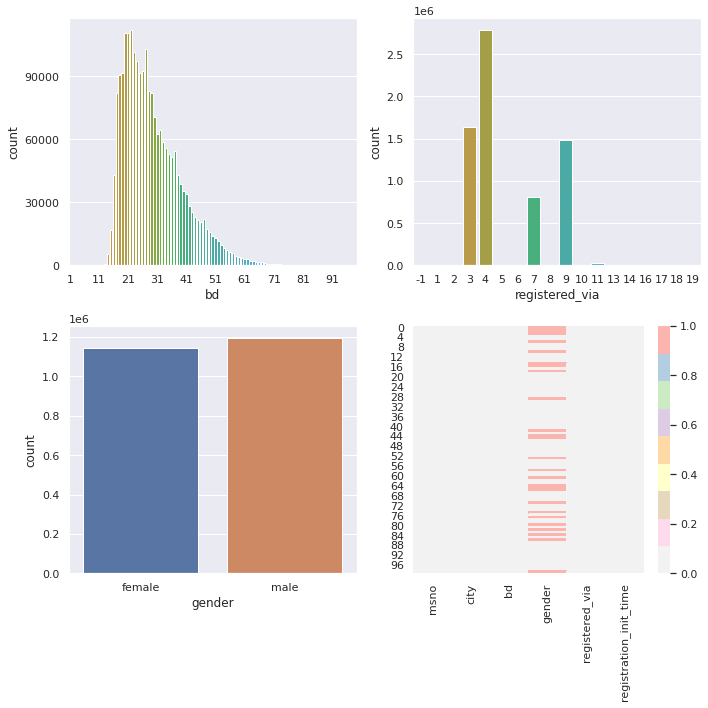

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(member_data['bd'][member_data['bd']>0][ member_data['bd']<100])  # masking to avoid outliers
plt.tight_layout()
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,120000,30000))
plt.subplot(222)
sns.countplot(member_data['registered_via'])             # count of registered via
plt.tight_layout()
plt.subplot(223)
sns.countplot(member_data['gender'])                    # count of gender
plt.tight_layout()
plt.subplot(224)
sns.heatmap(member_data[:100].isnull(),cmap='Pastel1_r') # finding Null value
plt.tight_layout()
plt.show()

<h2> We See </h2>
1. There is a peak in the Age plot<br>
2. There are some favourate/ most used registered via method<br>
3. Gender plot is approx same<br>
4. only gender data is absent(null)<br>

> Gender can be neglected as most of the gender are unknown and known gender are almost equally distributed<br> Method 3,4,7,9 are preferred by people<br>as a feature engineering we can make a flag (binary) whether registration via comes from most used method<br>
another feature is we can bin age feature whether they are teenager or not

In [21]:
member_data['registered_via'].nunique()

18

In [22]:
member_data['msno'].nunique()

6769473

In [23]:
member_data['registered_via'].value_counts()

 4     2793213
 3     1643208
 9     1482863
 7      805895
 11      25047
 13       5455
 8        3982
 5        3115
 17       1494
 2        1452
 6        1213
 19        974
 16        888
 14        615
 1          43
 10         10
 18          5
-1           1
Name: registered_via, dtype: int64

In [24]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(member_data['registered_via'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,-1.0
10.000,3.0
20.000,3.0
30.000,4.0
40.000,4.0
50.000,4.0
60.000,4.0
70.000,7.0
80.000,9.0
90.000,9.0


<h3> We find </h3>
<br>
members data contains 6 fields with shape (6769473,6)
<br>
There is total 21 distinct city and city 1 being highest customer
<br>
Age columns clearly contains outliers hencit it should be corrected
<br>
Gender data is mostly not present in the dataset, type of gender data is string
<br>
There is 18 distinct registered via options 
<br> 
Most of the teenager and yongster listen songs


__Note__ Transaction data is in 2 parts. we are using only second part for visualisations

In [25]:
# transaction v2 is stored in transaction_data dataframe
#we are parsing transaction date and membership expire date
# we will use both transaction and transactionv2 in preprocessing
transaction_data=pd.read_csv('/home/asad_99rizvi/dataset/transactions_v2.csv',parse_dates=['transaction_date','membership_expire_date'])

In [26]:
transaction_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0


This dataframe consist of 9 feature <br>
No string features except id (msno) <br>

In [27]:
transaction_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000
mean,37.918355,66.017696,281.787035,281.317241,0.785303,0.024551
std,4.964805,102.486396,435.186138,435.419950,0.410612,0.154753
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,30.000000,99.000000,99.000000,1.000000,0.000000
50%,40.000000,30.000000,149.000000,149.000000,1.000000,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000
max,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000


no outliers in auto renew<br>
no outlier in is_cancel<br>
High level stastistics of actual amount paid and plan list price is same <br>
mean of actual amount paid and plan list price is different hence there is some difference between them<br>

In [28]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1431009 non-null  object        
 1   payment_method_id       1431009 non-null  int64         
 2   payment_plan_days       1431009 non-null  int64         
 3   plan_list_price         1431009 non-null  int64         
 4   actual_amount_paid      1431009 non-null  int64         
 5   is_auto_renew           1431009 non-null  int64         
 6   transaction_date        1431009 non-null  datetime64[ns]
 7   membership_expire_date  1431009 non-null  datetime64[ns]
 8   is_cancel               1431009 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 98.3+ MB


Same memory optimization can be used

In [29]:
transaction_data.shape

(1431009, 9)

<h2> plotting count vs payment method id </h2>

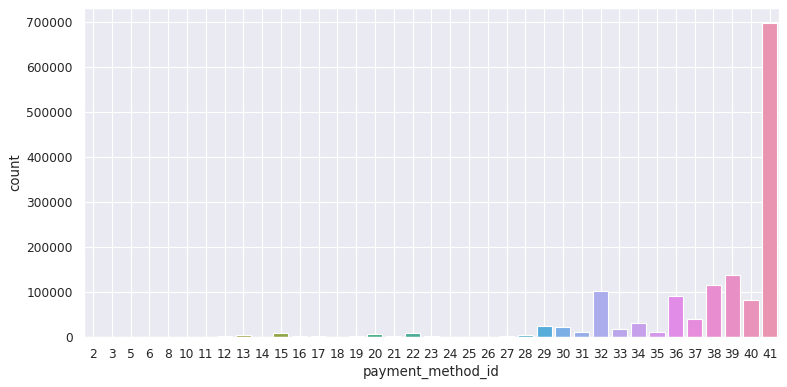

In [30]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['payment_method_id'])
plt.tight_layout()
plt.grid(True)
plt.show()

In [31]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['payment_method_id'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,2.0
10.000,32.0
20.000,36.0
30.000,38.0
40.000,39.0
50.000,40.0
60.000,41.0
70.000,41.0
80.000,41.0
90.000,41.0


later payment method is more popular<br>
41 payment method is more popular<br>
since it is in "int" format we have to do encoding<br>
very large values in categories  hence one hot encoding will create sparsity<br>
As a feature engineering we can create flag whether they use from more popular method 

<h2>plot between count vs payment plan days</h2>

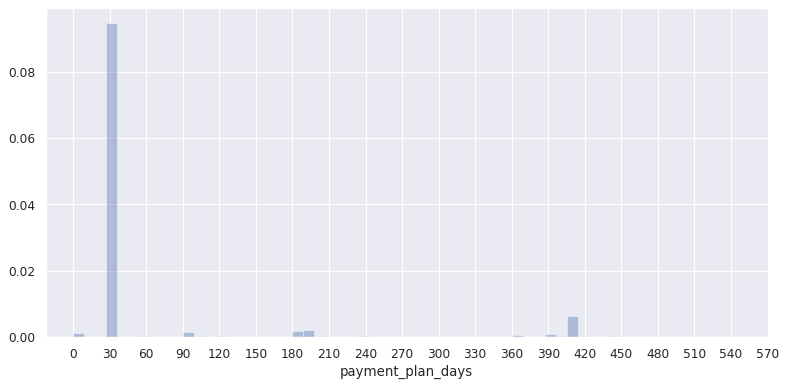

In [32]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['payment_plan_days'])
plt.xticks(range(0,600,30))
plt.tight_layout()
plt.show()

In [33]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['payment_plan_days'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,30.0
20.000,30.0
30.000,30.0
40.000,30.0
50.000,30.0
60.000,30.0
70.000,30.0
80.000,30.0
90.000,195.0


almost every one takes 30 month plan<br>
people who take plan of 420 days will have less chance of churning <br>
we can create a feature indicator of payment plan whether they are above 150 or not

<h2> plot between counts vs plan list price</h2>

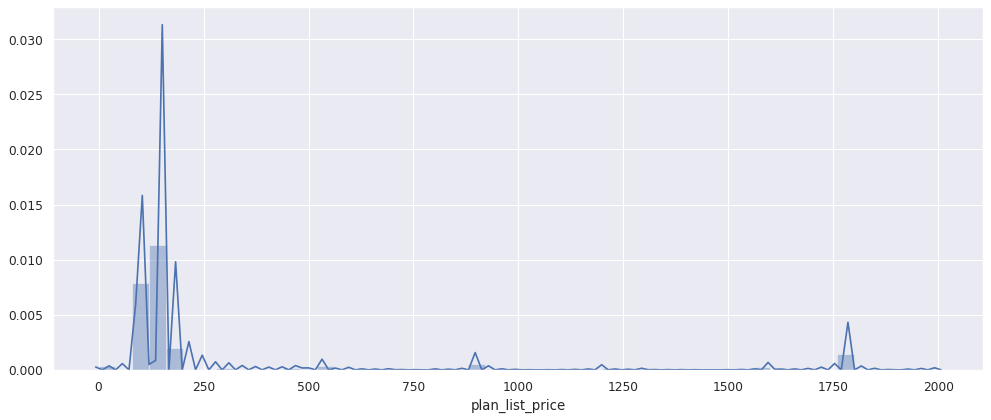

In [34]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['plan_list_price'])
plt.show()

In [35]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['plan_list_price'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,99.0
20.000,99.0
30.000,100.0
40.000,149.0
50.000,149.0
60.000,149.0
70.000,149.0
80.000,180.0
90.000,799.0


some people choose very high price <br>
These passionate people tends to not churn. HEnce an indicator can be used<br>

<h2>plot between counts vs actual price paid</h2>

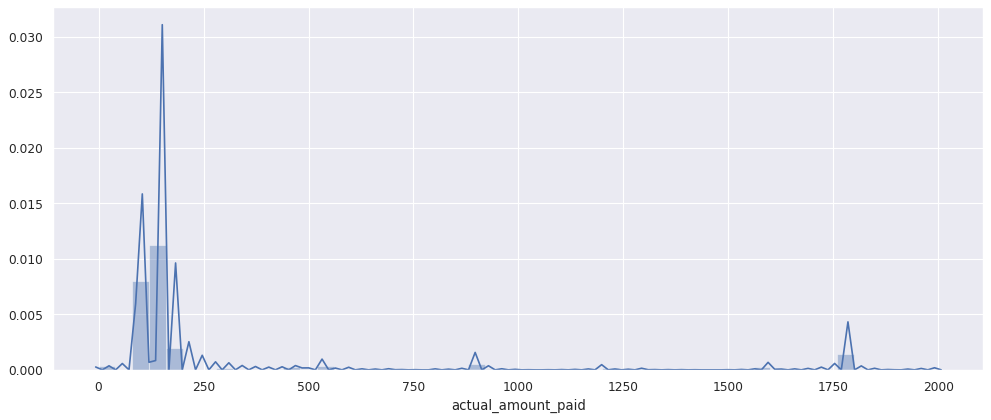

In [36]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['actual_amount_paid'])
plt.show()

In [37]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['actual_amount_paid'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,99.0
20.000,99.0
30.000,99.0
40.000,149.0
50.000,149.0
60.000,149.0
70.000,149.0
80.000,180.0
90.000,799.0


actual amount paid and plan list graph is almost similar<br>
No obvious distinction can be made with graph little deeper study is required

<h2>plots between </h2>
1.counts and is auto renew<br>
2. counts and is cancel <br>

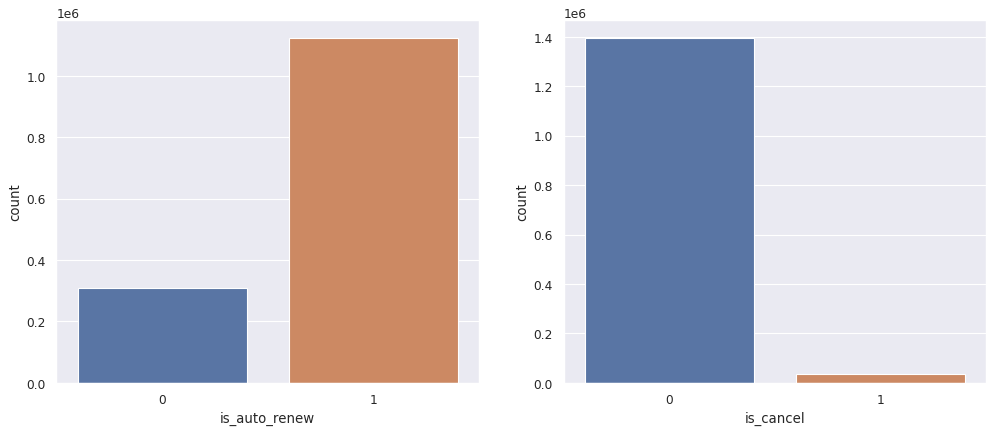

In [38]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
sns.countplot(transaction_data['is_auto_renew'])
plt.subplot(122)
sns.countplot(transaction_data['is_cancel'])
plt.show()

<h3> We find </h3>
<br>
payment id ranges from 2-41 in which 41 being the most favourable method of all
<br>
payment plan days have a very wide range of 450 but most of the users prefer 30 day plan
<br>
plan list price and actual amount paid is theortical and actual price although high level stats of both the data are same
<br>
There are two date-type features: transaction_date and membership_expire_date. 
<br> These features are used to decide whether user has churned or not because if there is No new subscribtion within 30 days the customer is considered as churned
<br>
whether or not the user canceled the membership in this transaction.

> since theorotical and actual price looks same at first. lets get deep to check if there is a difference of not

In [39]:
(transaction_data['actual_amount_paid']!=transaction_data['plan_list_price']).value_counts()

False    1419106
True       11903
dtype: int64

> there is some difference between actual and therotical orice paid by users

In [40]:
temp_data=transaction_data[transaction_data['actual_amount_paid']!=transaction_data['plan_list_price']] 
# checking only where there is actually a difference

<h2> plot count vs difference in the actual and paid amount

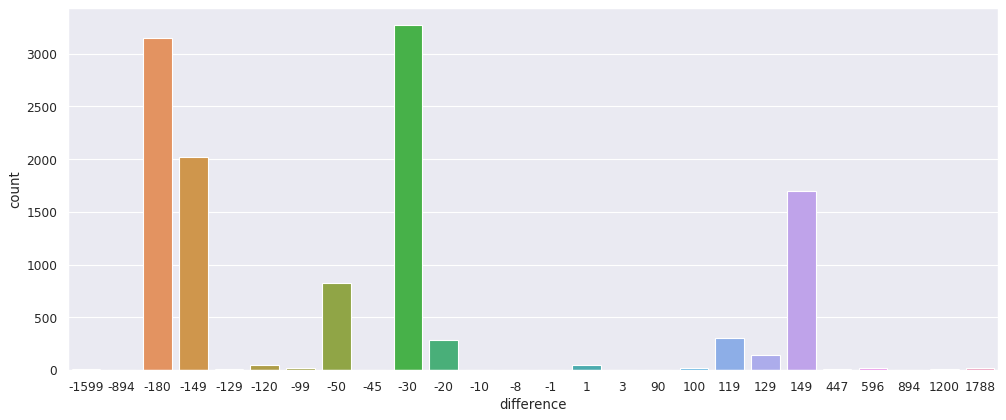

In [41]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('difference')
sns.countplot(temp_data['actual_amount_paid']-temp_data['plan_list_price'])
plt.show()

Most of the people got difference of 30, 149 And 180 <br>
<h3>
<font color='blue'>Most intresting thing is people are paying more then what they should have</font>
    </h3>

> user_logs.csv is hge file we are using subset for visualization

In [42]:
# user logs v2 is stored in user_logs dataframe
# parsing date 
user_logs=pd.read_csv('/home/asad_99rizvi/dataset/user_logs_v2.csv',parse_dates=['date'])

In [43]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558


Contains 9 columns all numerical features<br>
Since it is user logs more than 1 entry of single user is very common and obvious<br>
logs are divided on the basics of days 

In [44]:
user_logs.shape # Note this is just 1 month of data initial log file is very large 32 GB in size

(18396362, 9)

In [45]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   msno        object        
 1   date        datetime64[ns]
 2   num_25      int64         
 3   num_50      int64         
 4   num_75      int64         
 5   num_985     int64         
 6   num_100     int64         
 7   num_unq     int64         
 8   total_secs  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 1.2+ GB


Memory can be optimized

In [46]:
user_logs.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000
mean,6.191401,1.508789,0.941376,1.079905,30.282461,29.036146,7904.813556
std,13.428266,3.908539,1.924840,3.518409,42.036412,32.198660,10136.323015
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1959.944000
50%,2.000000,1.000000,0.000000,0.000000,17.000000,18.000000,4582.990000
75%,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9848.441000
max,5639.000000,912.000000,508.000000,1561.000000,41107.000000,4925.000000,9194058.522000


msno: user id<br>
date: format %Y%m%d <br>
num_25: # of songs played less than 25% of the song length <br>
It can be seen that for most of the users num25 and num100 is high and num50 and num75 is mostly low<>
num_50: # of songs played between 25% to 50% of the song length<br>
num_75: # of songs played between 50% to 75% of of the song length<br>
num_985: # of songs played between 75% to 98.5% of the song length<br>
num_100: # of songs played over 98.5% of the song length<br>
num_unq: # of unique songs played<br>
total_secs: total seconds played<br>

In [47]:
# printing percentiles because above we have seen that maximum values of there features are unusually high
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_25'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,1.0
40.000,1.0
50.000,2.0
60.000,4.0
70.000,5.0
80.000,9.0
90.000,16.0


clearly there are some outlier 

>_ it looks this has some outliers

In [48]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_50'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.00000
10.000,0.00000
20.000,0.00000
30.000,0.00000
40.000,0.00000
50.000,1.00000
60.000,1.00000
70.000,1.00000
80.000,2.00000
90.000,4.00000


In [49]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_75'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,1.0
70.000,1.0
80.000,2.0
90.000,3.0


In [50]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_985'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,1.0
70.000,1.0
80.000,2.0
90.000,3.0


In [51]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_100'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.00000
10.000,2.00000
20.000,5.00000
30.000,8.00000
40.000,12.00000
50.000,17.00000
60.000,23.00000
70.000,31.00000
80.000,45.00000
90.000,75.00000


Conclusion made from above dataframes are that we need to set a threshold above some value bacause it looks like outlier

<h2>plots beween</h2>
1. distribution of num_25<br>
2. distribution of num_50<br>
3. distributuin of num_75<br>
4. distribution of num_985<br>
5. distribution of num_100<br>

<AxesSubplot:xlabel='num_100'>

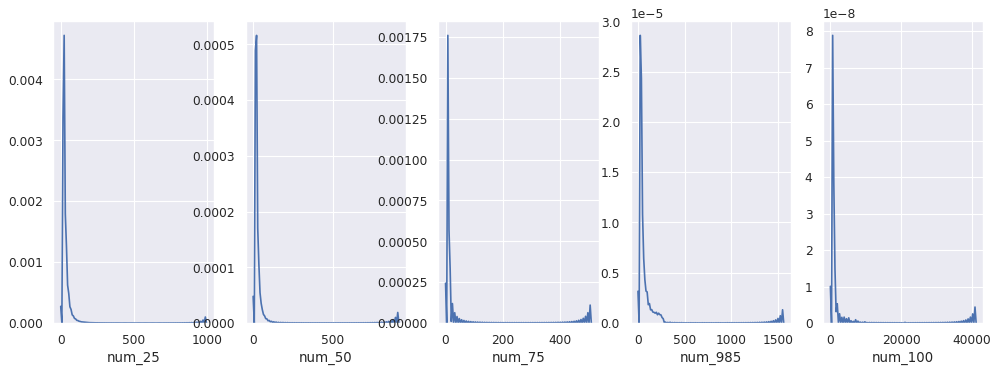

In [52]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(151)
sns.distplot(user_logs['num_25'][user_logs['num_25']<1000],hist=False)
plt.subplot(152)
sns.distplot(user_logs['num_50'],hist=False)
plt.subplot(153)
sns.distplot(user_logs['num_75'],hist=False)
plt.subplot(154)
sns.distplot(user_logs['num_985'],hist=False)
plt.subplot(155)
sns.distplot(user_logs['num_100'],hist=False)

<h2> we Find </h2>
rise and fall and then again rise in all the plots

This pattern is very obvious and common most of the people listen some songs<br>
very intresting observation is almost in all the 5 graph <br>
there is minima in the middle i.e The value again rises in the end

<h2> plot between counts and entries per user </h2>

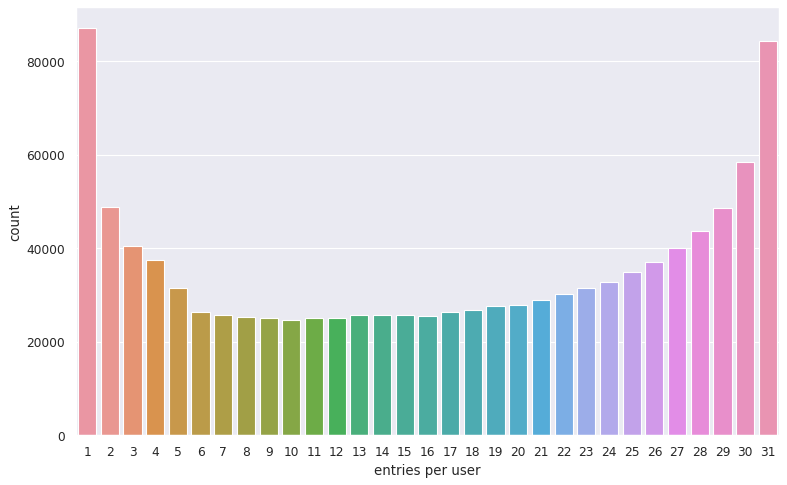

In [53]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(user_logs['msno'].value_counts().values)
plt.tight_layout()
plt.xlabel("entries per user")
plt.ylabel('count')
plt.show()

it can be seen that either we have very little info about the user or we have many info about the user 

I think listening 1200 songs in 1 day is not possile atleast for me so i will consider values above 1200 as outliers

There are very less people who listens 50-75% of songs<br>
people either listed less than 25% of the song of 100 % the sond<br>
this shows how much a user loved a song

 <h2><font color='blue'> Lets Do some Date and Time plots</font><h2>

<img src='https://i.imgur.com/xuo6LM8.png'>

> Date and Time plots are very intresting

__Note__: plots below are of registration 

In [54]:
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

<h2> count vs initial registration date </h2>

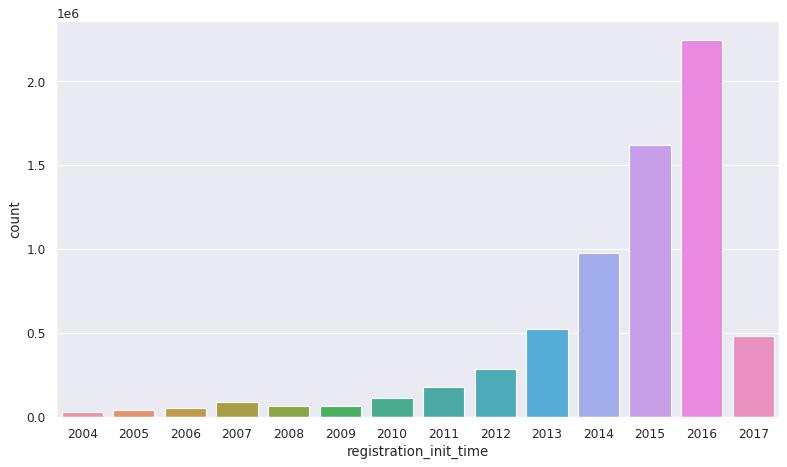

In [55]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.year)
plt.tight_layout()

A very exponential growth can be seen in the graph<br>
Since we dont have complete data of 2017 so we can't comment on that part<br>
this type of graph is very good business

<h2> plot between count and registration init time month</h2>

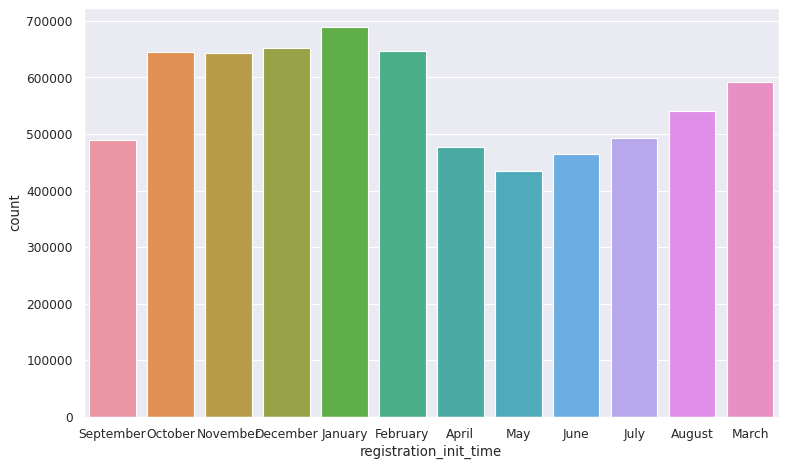

In [56]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.month_name())
plt.tight_layout()

people tend to make registration in later months i.e ending and starting of year<br>
Company can give some discount on middle months to increase profit

<h2> plot between count and day in week </h2>

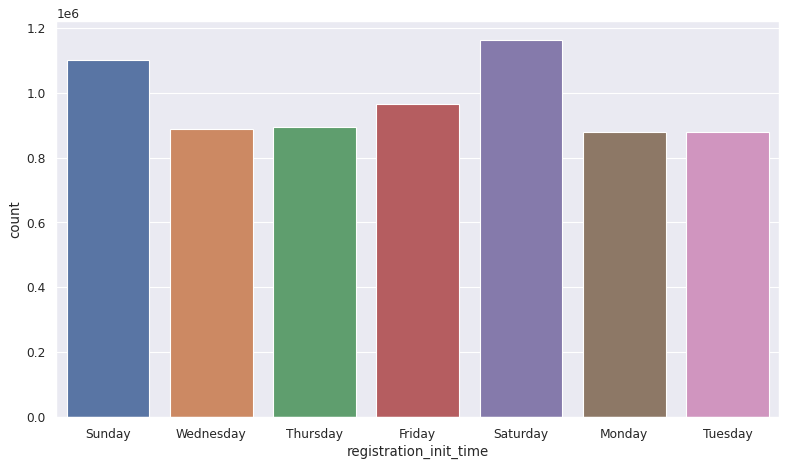

In [57]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.day_name())
plt.tight_layout()

<h3> We find </h3>
<br>
In the initial yeras there is slow growth but in later year growth start increasing very fast. there is a dip in last year<br>
more people register on weekends (saturday and sunday)
<br>
May, June, July have lower number of registration<br>


> Lets Look at transaction  data

__Note__: plots below are of transaction

<h2> plot beween count and transaction date year wise analysis </h2>

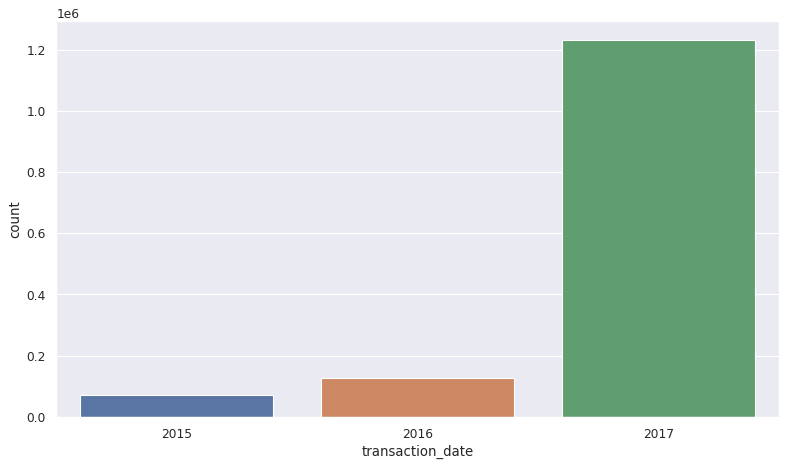

In [58]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.year)
plt.tight_layout()

Since most of the people use mothly subscription and we are given data of 2017 <br>
So this graph is expected<br>

<h2> counts vs month of transaction data </h2>

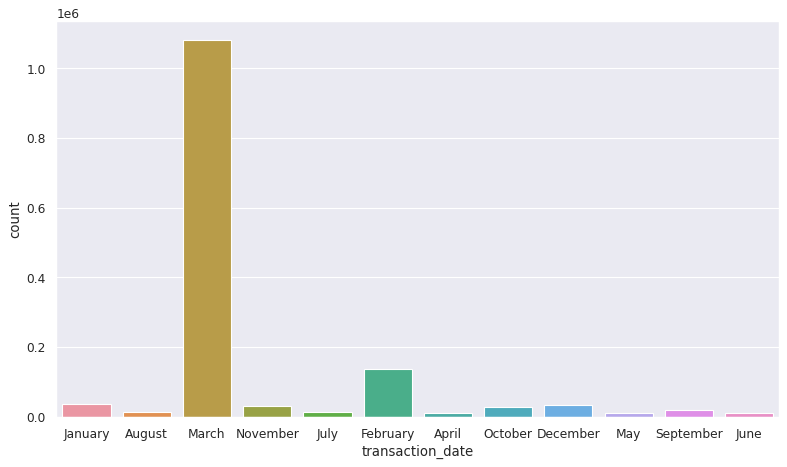

In [59]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.month_name())
plt.tight_layout()

Marh data is unusally high because we are seeing data that is of March <br>
The plot will change if we include both transaction data

<h2> plot between count and transaction date day of week wise </h2>

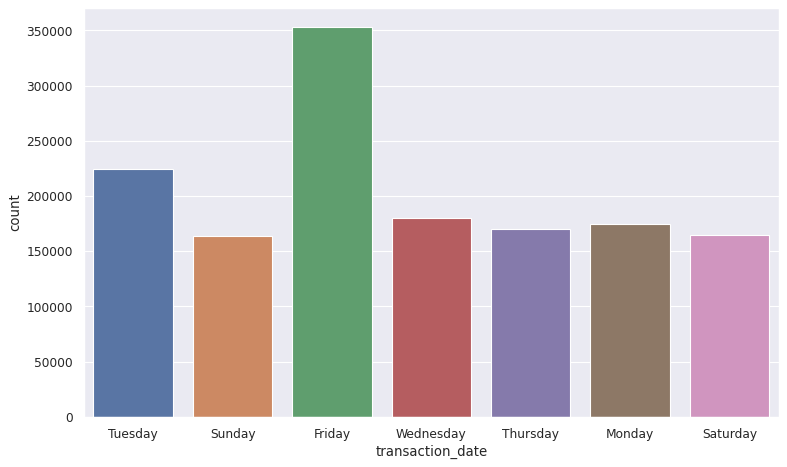

In [60]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.day_name())
plt.tight_layout()

<h3> We find </h3>
<br>
most of the tranaction are done on month of March and next on ferbuary<br>
friday has the most number of the transaction
<br>
we can see that the number of the transaction is increasing year by year<br>

__Note__: plots below are of membership expiration date

In [61]:
transaction_data['membership_expire_date'].dt.year.value_counts()

2017    1354731
2018      66549
2019       6735
2020       2074
2021        604
2022        143
2023         41
2024         32
2027         32
2025         20
2026         20
2016         11
2028         10
2035          1
2030          1
2031          1
2032          1
2033          1
2034          1
2036          1
Name: membership_expire_date, dtype: int64

In [62]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['membership_expire_date'].dt.year,percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,2016.0
10.000,2017.0
20.000,2017.0
30.000,2017.0
40.000,2017.0
50.000,2017.0
60.000,2017.0
70.000,2017.0
80.000,2017.0
90.000,2017.0


Some people have exipration date in 2018 and later year<br>
They are long term users Hence have a low risk of churning

<h2> plot between count and membership expire date year wise</h2>

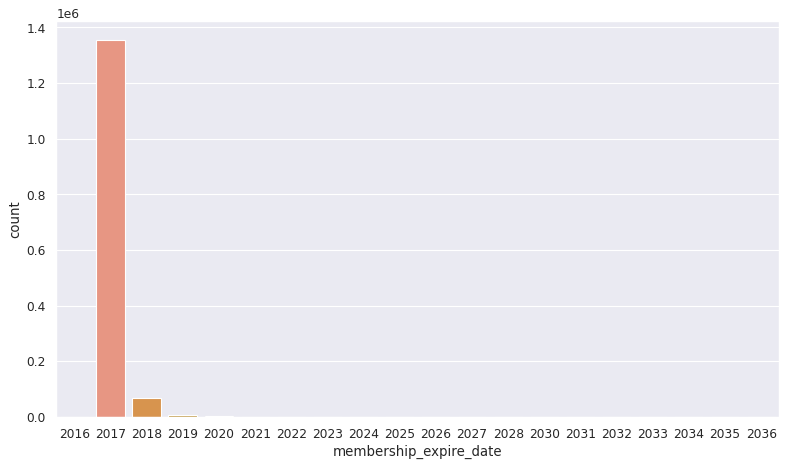

In [63]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.year)
plt.tight_layout()

this plot is very consistent with the fact that people take monthly subscription hence their expiration date is in same year

In [64]:
transaction_data['membership_expire_date'].dt.month_name().value_counts()

April        1037972
May           142927
March          57106
June           39078
July           27782
August         26938
September      25030
October        18034
November       14913
January        14268
February       13532
December       13429
Name: membership_expire_date, dtype: int64

Most of the people subcription ends in April because this data is of March

<h2> count and month of membership expire date </h2>

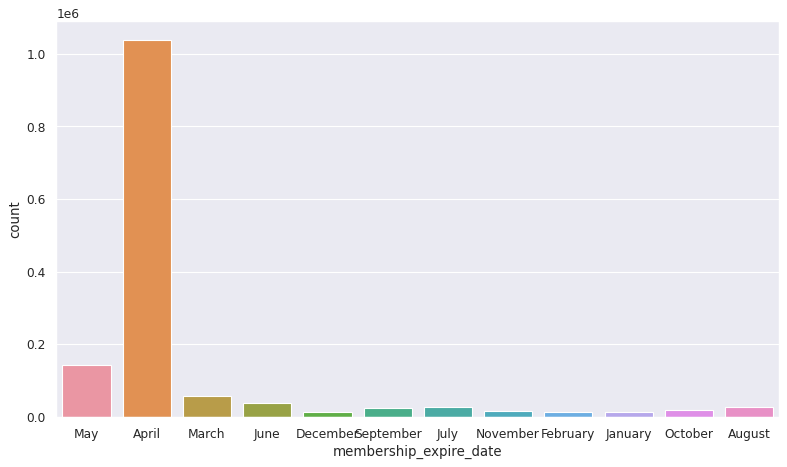

In [65]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.month_name())
plt.tight_layout()

Since cancelling subscription is not counted as churn so the people whos subscription ending after april are of low risk of churning

<h2> plot between coutn and member expire date day of week wise </h2>

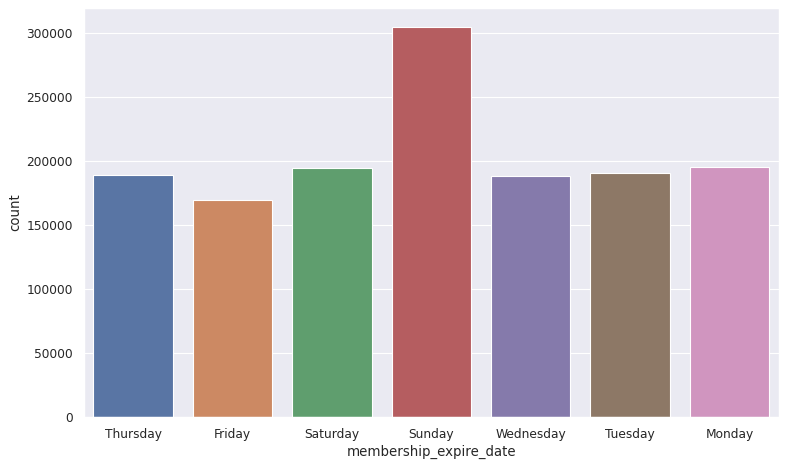

In [66]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.day_name())
plt.tight_layout()

<h3> We find </h3>
<br>
expiration date is very consistent with transaction data most of the customers within month do trasnaction<br>
most of the subscribtion endwithin same year that shows people dont invent in long term subscription
<br>
sunday is the most likely day for end of subscription

<h2> plot between count and month of transaction </h2>

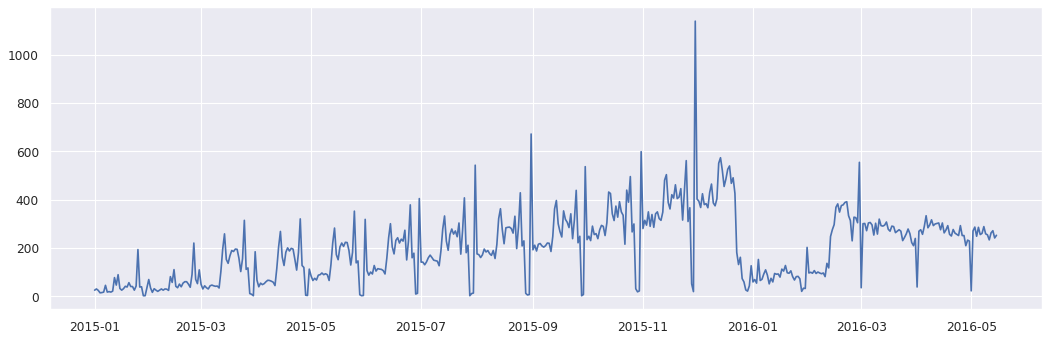

In [67]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(transaction_data['transaction_date'].value_counts().sort_index()[:500])

There is a pattern that is repeating and it is increasing with year <br>
growth shows increase in the business of company<br>
repeating pattern shows behavious of the customer<br>


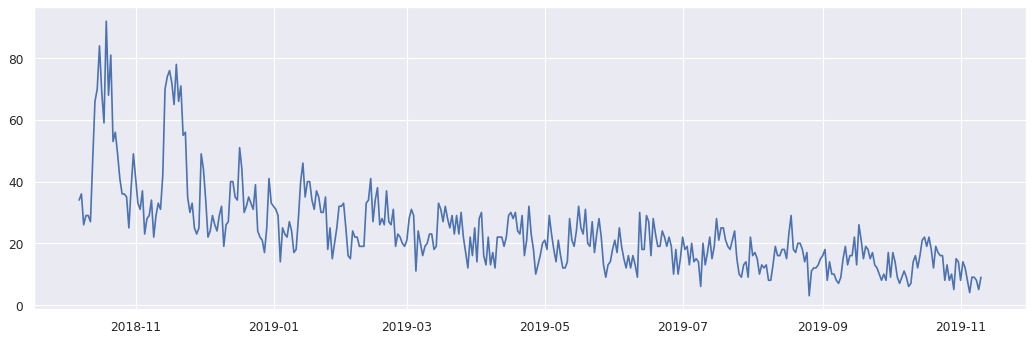

In [68]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(transaction_data['membership_expire_date'].value_counts().sort_index()[600:1000])

Here We can se there is a pattern on monthly basis that is repeating itself and its increasing with time

<h3><strong><font color='green'>Now lets see some features with respect to our taget variable</font></strong></h3>

In [69]:
# merging train data and member data and storing it in train_member dataframe
train_member=pd.merge(train_data,member_data,how='left',on='msno')

In [70]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25


<h2> plot beween</h2>
1. gender and count with respect to churn<br>
2. registered viaand count with respect to churn

[]

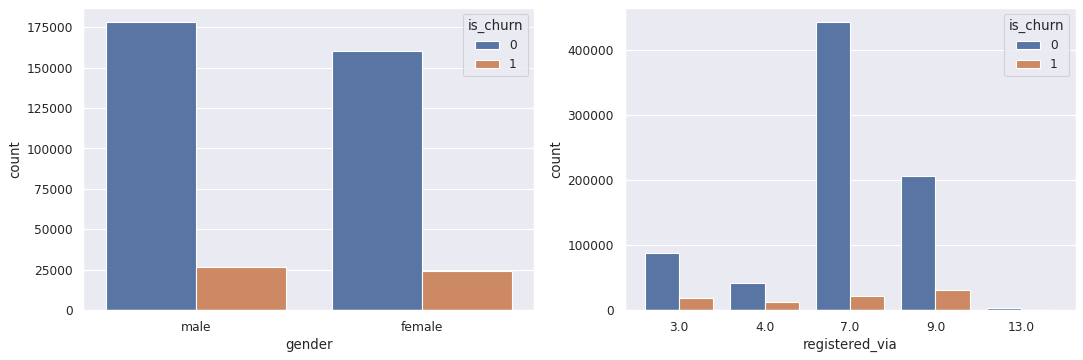

In [71]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
sns.countplot(data=train_member,x='gender',hue='is_churn')
plt.subplot(122)
sns.countplot(data=train_member,x='registered_via',hue='is_churn')
plt.plot()

Gender has a very little impact on churning<br>
people who use method 9 has more churn<br> We can create flag for that

<h2> plot between </h2>
1.city and count with hue as churn

<AxesSubplot:xlabel='city', ylabel='count'>

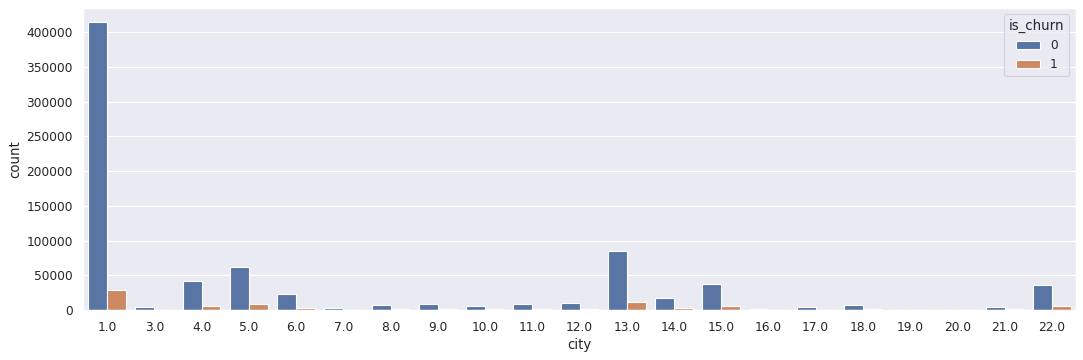

In [72]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data=train_member,x='city',hue='is_churn')

people who belong to city 4,5,15,22 have more churn rate<br>
Note that city 13 have less churn rate than 5 and 22

<h2>plot between density of age with respect to churn</h2> 

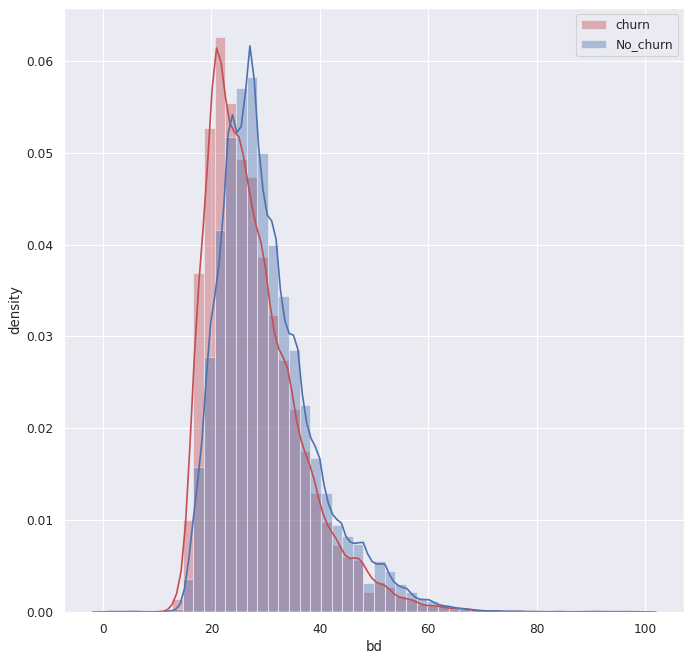

In [73]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(train_member['bd'][(train_member['is_churn']==1)&(train_member['bd']>0)&(train_member['bd']<100)],color='r',label='churn')
sns.distplot(train_member['bd'][(train_member['is_churn']==0)&(train_member['bd']>0)&(train_member['bd']<100)],label='No_churn')
plt.ylabel('density')
plt.legend()
plt.show()

Above plot shows teenagers tends to churn more <br>
This is is not significantly important but it definately has some value in differentiating

In [74]:
# merging all 3 data i.e train member and transaction
train_member_transaction=pd.merge(train_member,transaction_data,how='left',on='msno')

In [75]:
train_member_transaction.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0


<h2> plot between density and price (actual ) with respect to churn </h2>

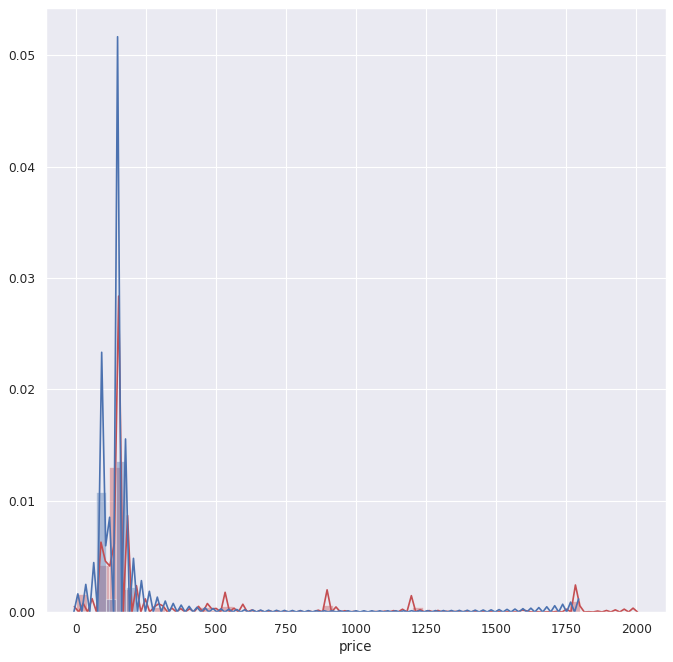

In [76]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(train_member_transaction['actual_amount_paid'][(train_member_transaction['is_churn']==1)],color='r')
sns.distplot(train_member_transaction['actual_amount_paid'][(train_member_transaction['is_churn']==0)])
plt.xlabel("price")
plt.show()

<h3> We find </h3>
<br>
some of the features are capable of predicting whether a user will churn or not
<br>
There is no stong feature helping us to identify the target variable
<br>
feature importance are distributed in all features

In [77]:
train_member_transaction.drop(labels=['registration_init_time','transaction_date','membership_expire_date'],axis=1,inplace=True)
train_member_transaction.dropna(inplace=True)
train_member_transaction.sort_values(by='is_churn',inplace=True,ascending=False)
train_member_transaction.reset_index(drop=True,inplace=True)

<h2> pair plots </h2>

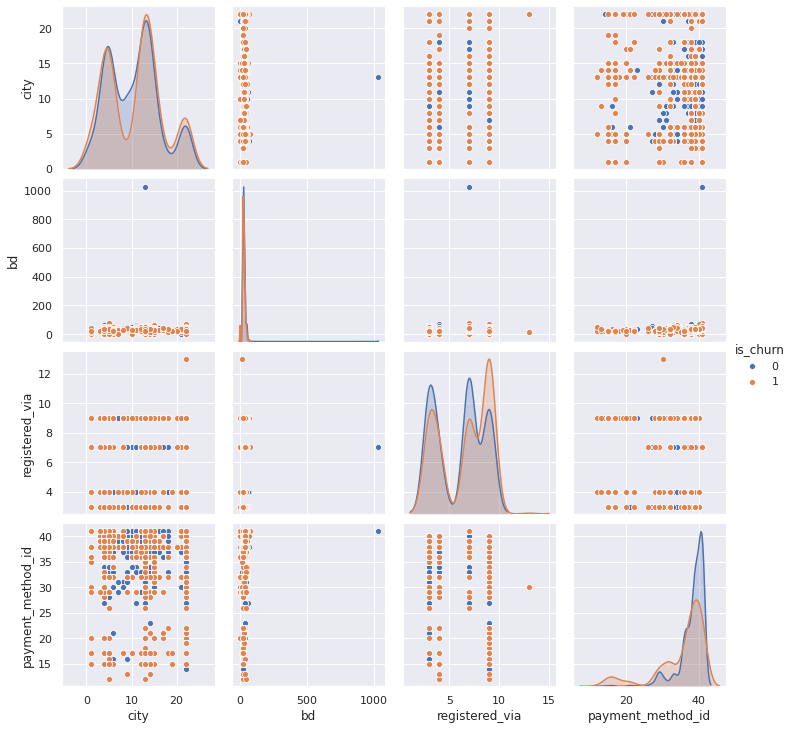

In [78]:
%matplotlib inline
sns.pairplot(data=train_member_transaction[57380:59380].iloc[:,:7],hue='is_churn')

we can see that both churned and not churned customer almost overlap on each other<br>
It is very difficult to find which customer will churn with this features we have to come up with different features that best differentiate both of them<br>
clearly there are some outliers 

In [79]:
# I have Re-Run The whole kernel in one shot and there was no hiccups 

# Next part is of Data Cleaning and Preprocessing

> A Clean Place is a safe place